# Import Library

In [0]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [0]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [41]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [43]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
model = Sequential()

In [0]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#卷積層2與池化層2

In [0]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(0.25))

In [0]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))

In [0]:
model.add(Dense(10, activation='softmax'))

In [56]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

# 訓練模型

 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train,test,KPI):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[test])
    plt.title('Train History of '+ KPI)
    if KPI=='acc' :
        plt.ylabel('Accuracy')
    elif KPI == 'loss' :
                 
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [0]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])


In [59]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 23s 568us/step - loss: 0.0897 - acc: 0.1268 - val_loss: 0.0893 - val_acc: 0.1740
Epoch 2/10
40000/40000 [==============================] - 22s 553us/step - loss: 0.0887 - acc: 0.1654 - val_loss: 0.0884 - val_acc: 0.2255
Epoch 3/10
40000/40000 [==============================] - 23s 564us/step - loss: 0.0871 - acc: 0.2064 - val_loss: 0.0869 - val_acc: 0.2583
Epoch 4/10
40000/40000 [==============================] - 22s 552us/step - loss: 0.0851 - acc: 0.2444 - val_loss: 0.0852 - val_acc: 0.2810
Epoch 5/10
40000/40000 [==============================] - 22s 551us/step - loss: 0.0835 - acc: 0.2685 - val_loss: 0.0839 - val_acc: 0.3039
Epoch 6/10
40000/40000 [==============================] - 22s 549us/step - loss: 0.0824 - acc: 0.2917 - val_loss: 0.0831 - val_acc: 0.3194
Epoch 7/10
40000/40000 [==============================] - 22s 549us/step - loss: 0.0813 - acc: 0.3079 - val_loss: 0.

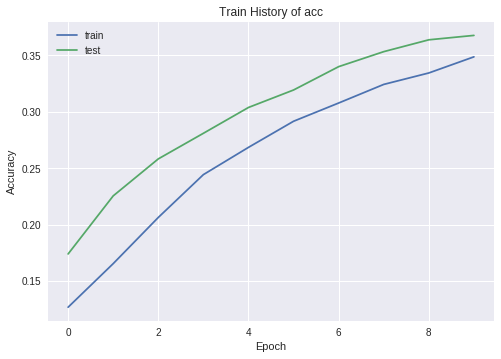

In [60]:
show_train_history('acc','val_acc','acc')

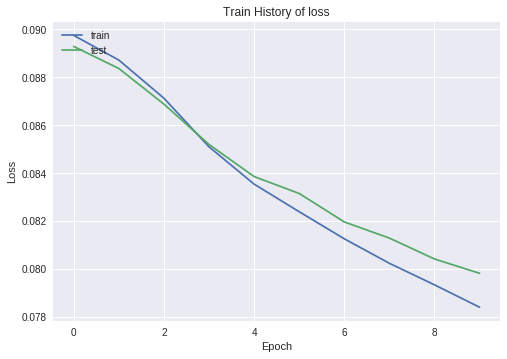

In [61]:
show_train_history('loss','val_loss','loss')

In [0]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [63]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 24s 591us/step - loss: 0.2670 - acc: 0.9037 - val_loss: 0.2673 - val_acc: 0.9011
Epoch 2/10
40000/40000 [==============================] - 23s 576us/step - loss: 0.2539 - acc: 0.9058 - val_loss: 0.2556 - val_acc: 0.9025
Epoch 3/10
40000/40000 [==============================] - 23s 574us/step - loss: 0.2441 - acc: 0.9077 - val_loss: 0.2495 - val_acc: 0.9034
Epoch 4/10
40000/40000 [==============================] - 23s 573us/step - loss: 0.2361 - acc: 0.9098 - val_loss: 0.2418 - val_acc: 0.9045
Epoch 5/10
40000/40000 [==============================] - 23s 585us/step - loss: 0.2291 - acc: 0.9115 - val_loss: 0.2348 - val_acc: 0.9066
Epoch 6/10
40000/40000 [==============================] - 23s 577us/step - loss: 0.2231 - acc: 0.9132 - val_loss: 0.2288 - val_acc: 0.9088
Epoch 7/10
40000/40000 [==============================] - 23s 576us/step - loss: 0.2173 - acc: 0.9154 - val_loss: 0.

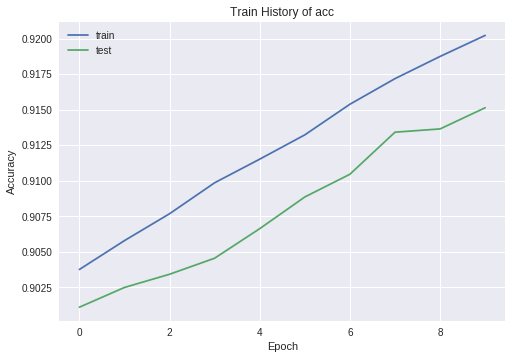

In [64]:
show_train_history('acc','val_acc','acc')

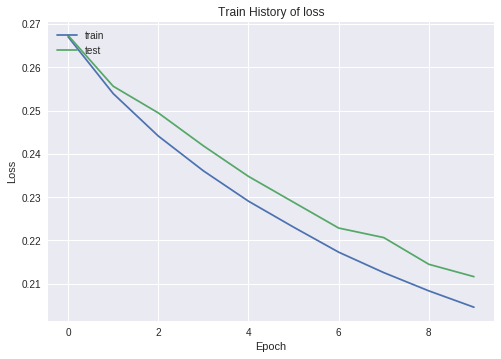

In [66]:
show_train_history('loss','val_loss','loss')

### 使用 binary_crossentropy 當損失函數，準確度會比用 MSE 來的高
